In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_excel('covid19_dataset.xlsx',sheet_name='All',index_col=0)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5644 entries, 44477f75e8169d2 to 2697fdccbfeb7f7
Columns: 110 entries, Patient age quantile to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(36)
memory usage: 4.8+ MB


In [4]:
#Analise se os testes mais comuns são aplicados nas mesmas pessoas

In [5]:
def drop_cols(df):
    for column in df:
        if df[column].isnull().sum()>5043:
            train.drop(column,axis=1, inplace=True)
    return df

In [6]:
df = drop_cols(train)
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.102004,0.318366,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
numerical = df.select_dtypes(include=[np.number])
numerical_final = numerical.dropna(axis=0)
numerical_final

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
Patient ID,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,0,0,0,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
8bb9d64f0215244,1,0,1,0,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
6c9d3323975b082,9,0,0,0,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
d3ea751f3db9de9,11,0,0,0,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
2c2eae16c12a18a,9,0,0,0,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5b44ff9c7782fd,19,0,0,0,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
88cce1444e16f9c,19,0,0,0,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
2733fac0d3f7138,15,0,0,0,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812


In [8]:
categorical = df.select_dtypes(include=['object'])
categorical_final = categorical.dropna(axis=0)
categorical_final

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
6c9d3323975b082,negative,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,negative,positive
fe656baa2bfc5dd,negative,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
ebdd7c67fcb21b4,negative,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
01d324f278f3101,negative,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfa1522418dc528,negative,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
0edc1a366792b62,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
c19b361d6ab2051,negative,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative


In [9]:
both = df.dropna()
both

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.102004,0.318366,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
6c9d3323975b082,9,negative,0,0,0,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,...,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,negative,positive
ebdd7c67fcb21b4,9,negative,1,0,0,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
01d324f278f3101,16,negative,0,0,0,0.671398,0.290940,0.135801,0.525133,0.173372,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
54ea170f12c4e76,9,negative,0,0,0,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d584d2cf7d09e1e,11,positive,0,0,1,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
0edc1a366792b62,0,negative,0,0,1,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
c19b361d6ab2051,0,negative,0,0,1,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative


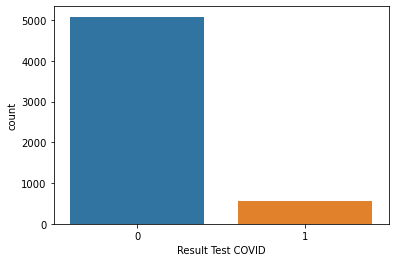

In [15]:
#Transformando a feature alvo em númerica, já adiciona direto a coluna nos númericos

train['SARS-Cov-2 exam result']
conditions = [(train['SARS-Cov-2 exam result']=='negative'),
             (train['SARS-Cov-2 exam result']=='positive'),
             ]
values = [0,1]

train['Result Test COVID'] = np.select(conditions,values)

sns.countplot('Result Test COVID', data = train)

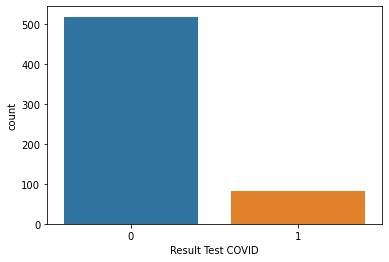

In [29]:
#Vendo os números de positivos e negativos dentro das variáveis numéricas
sns.countplot('Result Test COVID', data = numerical_final)


In [31]:
#Numero de Positivos nas variáveis númericas 

numerical_final['Result Test COVID'].sum()


83

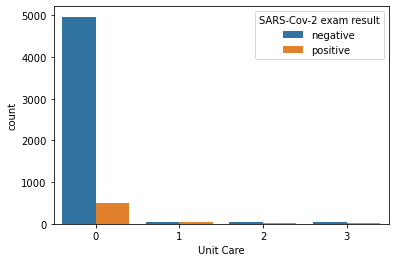

In [10]:
# Colocando em uma coluna única em qual internação o paciente está 
# 0 - None
# 1 - Regular
# 2 - Semi Intensive
# 3 - Intensive

conditions = [(train['Patient addmited to regular ward (1=yes, 0=no)']==1),
             (train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1),
             (train['Patient addmited to intensive care unit (1=yes, 0=no)']==1),
             (train['Patient addmited to regular ward (1=yes, 0=no)']==0) & (train['Patient addmited to semi-intensive unit (1=yes, 0=no)']==0) & (train['Patient addmited to intensive care unit (1=yes, 0=no)']==0)
             ]
values = [1,2,3,0]

train['Unit Care'] = np.select(conditions,values)

sns.countplot('Unit Care', hue='SARS-Cov-2 exam result', data = train)

In [32]:
Data_Numerical = numerical_final.drop(numerical_final.columns[1:4],axis=1)
Data_Numerical = Data_Numerical.drop('Unit Care',axis=1)
Data_Numerical

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Result Test COVID
Patient ID,,,,,,,,,,,,,,,
126e9dd13932f68,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
8bb9d64f0215244,1,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0
6c9d3323975b082,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,0
d3ea751f3db9de9,11,0.991838,0.792188,0.072992,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
2c2eae16c12a18a,9,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5b44ff9c7782fd,19,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.054585,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
88cce1444e16f9c,19,-0.289922,-0.523588,0.663397,0.754327,-1.532437,-1.050367,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,0
2733fac0d3f7138,15,0.717175,1.105468,-0.492289,0.613284,0.002791,1.538664,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0


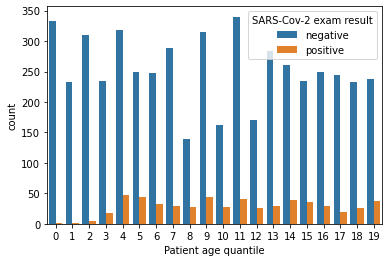

In [17]:
sns.countplot('Patient age quantile', hue='SARS-Cov-2 exam result', data = train)

In [18]:
Total_Age = train.groupby('Patient age quantile').count()['SARS-Cov-2 exam result']
Total_Age

Patient age quantile
0     334
1     234
2     315
3     251
4     366
5     294
6     281
7     319
8     167
9     359
10    190
11    380
12    197
13    313
14    299
15    269
16    279
17    263
18    259
19    275
Name: SARS-Cov-2 exam result, dtype: int64

In [19]:
Age_Positive = train[train['SARS-Cov-2 exam result']=='positive'].groupby('Patient age quantile').count()['SARS-Cov-2 exam result']
Age_Positive

Patient age quantile
0      1
1      2
2      5
3     17
4     47
5     44
6     33
7     30
8     27
9     44
10    27
11    40
12    26
13    30
14    39
15    35
16    29
17    19
18    26
19    37
Name: SARS-Cov-2 exam result, dtype: int64

In [138]:
Percentil_Positive = Age_Positive/Total_Age
Percentil_Positive

Patient age quantile
0     0.002994
1     0.008547
2     0.015873
3     0.067729
4     0.128415
5     0.149660
6     0.117438
7     0.094044
8     0.161677
9     0.122563
10    0.142105
11    0.105263
12    0.131980
13    0.095847
14    0.130435
15    0.130112
16    0.103943
17    0.072243
18    0.100386
19    0.134545
Name: SARS-Cov-2 exam result, dtype: float64

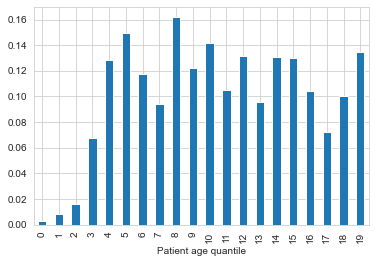

In [157]:
#Influencia da Idade no número de Positivados

Percentil_Positive.plot.bar()

In [159]:
#Início Transformação Variváveis Categoricas 

In [20]:
#Transformando em Números as categorias

def cat_to_num(item):
    if item =='not_detected' or item =='negative':
        return 0
    elif item == 'positive' or item =='detected': 
        return 1
    else:
        return item

In [33]:
categorical_final_test = categorical_final
Data_Categorical = pd.DataFrame()

for column in categorical_final_test:
    name = str(column)
    Data_Categorical[name]= categorical_final_test[column].apply(cat_to_num)
    
Data_Categorical
   

,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6c9d3323975b082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
fe656baa2bfc5dd,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ebdd7c67fcb21b4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01d324f278f3101,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfa1522418dc528,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0edc1a366792b62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
c19b361d6ab2051,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
#Transformando o último DataFrame

Data_Both_Final = both.drop(numerical_final.columns[1:4],axis=1)
Data_Both_Final

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
Patient ID,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,negative,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
6c9d3323975b082,9,negative,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,...,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,negative,positive
ebdd7c67fcb21b4,9,negative,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
01d324f278f3101,16,negative,0.671398,0.290940,0.135801,0.525133,0.173372,-1.249524,-0.653951,0.081693,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
54ea170f12c4e76,9,negative,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d584d2cf7d09e1e,11,positive,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,1.936978,0.038964,-0.529226,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
0edc1a366792b62,0,negative,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,0.642463,4.224283,-1.140144,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative
c19b361d6ab2051,0,negative,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,1.239930,0.495342,-1.140144,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative


In [35]:
#Transformando a feature alvo em númerica, já adiciona direto a coluna nos númericos

Data_Both_Final['SARS-Cov-2 exam result']
conditions = [(Data_Both_Final['SARS-Cov-2 exam result']=='negative'),
             (Data_Both_Final['SARS-Cov-2 exam result']=='positive'),
             ]
values = [0,1]

Data_Both_Final['Result Test COVID'] = np.select(conditions,values)


In [36]:
Data_Both_Final

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Result Test COVID
Patient ID,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,negative,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0
6c9d3323975b082,9,negative,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,...,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,negative,positive,0
ebdd7c67fcb21b4,9,negative,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0
01d324f278f3101,16,negative,0.671398,0.290940,0.135801,0.525133,0.173372,-1.249524,-0.653951,0.081693,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative,0
54ea170f12c4e76,9,negative,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,...,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,negative,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d584d2cf7d09e1e,11,positive,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,1.936978,0.038964,-0.529226,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,1
0edc1a366792b62,0,negative,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,0.642463,4.224283,-1.140144,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative,0
c19b361d6ab2051,0,negative,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,1.239930,0.495342,-1.140144,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0


In [39]:
Data_Both = Data_Both_Final.drop('SARS-Cov-2 exam result',axis=1)

In [40]:
Data_Both

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Result Test COVID
Patient ID,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0
6c9d3323975b082,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,...,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,negative,positive,0
ebdd7c67fcb21b4,9,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.710443,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0
01d324f278f3101,16,0.671398,0.290940,0.135801,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative,0
54ea170f12c4e76,9,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,-0.919529,...,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,negative,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d584d2cf7d09e1e,11,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,1.936978,0.038964,-0.529226,0.805435,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,1
0edc1a366792b62,0,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,0.642463,4.224283,-1.140144,-1.808146,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,positive,negative,0
c19b361d6ab2051,0,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,1.239930,0.495342,-1.140144,-0.710443,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative,0


In [41]:
#categorical_final_test = Data_Both
Data_NumandCat = pd.DataFrame()

for column in Data_Both:
    name = str(column)
    Data_NumandCat[name] = Data_Both[column].apply(cat_to_num)
    
Data_NumandCat

,Patient age quantile,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),...,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test",Result Test COVID
Patient ID,,,,,,,,,,,,,,,,,,,,,
126e9dd13932f68,17,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,...,0,0,0,0,0,0,0,0,0,0
6c9d3323975b082,9,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,...,0,0,0,1,0,0,0,0,1,0
ebdd7c67fcb21b4,9,-0.679027,-0.711556,0.952319,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.710443,...,0,0,0,0,0,0,0,0,0,0
01d324f278f3101,16,0.671398,0.290940,0.135801,0.525133,0.173372,-1.249524,-0.653951,0.081693,-0.501356,...,0,0,0,0,0,0,0,1,0,0
54ea170f12c4e76,9,-0.656139,-0.899524,-0.391795,-0.409276,1.862123,-1.149948,-0.681779,-0.529226,-0.919529,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d584d2cf7d09e1e,11,-0.450142,0.040316,-0.492289,-0.409276,-1.378914,1.936978,0.038964,-0.529226,0.805435,...,0,0,0,0,0,0,0,0,0,1
0edc1a366792b62,0,-2.418559,-2.152643,0.952319,-1.237902,-1.694489,0.642463,4.224283,-1.140144,-1.808146,...,0,0,0,0,0,0,0,1,0,0
c19b361d6ab2051,0,-1.182576,-0.836868,-0.693278,-0.462168,-0.671003,1.239930,0.495342,-1.140144,-0.710443,...,0,0,0,0,0,0,0,0,0,0


In [54]:
#Criando Saídas em CSV dos Datasets

Data_NumandCat.to_csv('Dataset_Num_Cat.csv',index=False)
Data_Categorical.to_csv('Dataset_Categorical.csv',index=False)
Data_Numerical.to_csv('Dataset_Numerical.csv',index=False)
